<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/Final_Tugas_Besar_Miranda_Eristiana_205150409111021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Deskripsi Tujuan Bisnis**


1. Dengan adanya data ini user akan mengetahui Rating dan Review dari tiap buku yang ada di website amazon.
2. Mengetahui mana saja buku yang paling populer di kalangan masyarakat.
3. Dapat mengetahui harga dari buku yang dijual.
4. Dapat mengetahui seberapa banyak review yang didapat dalam masing-masing buku.

> **Analisa Pendekatan**

Dalam analisa kali ini peneliti menggunakan metode EDA. *Exploratory Data Analysis* atau disebut dengan EDA merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan.
Langkah-langkah yang terdapat dalam metode EDA ini urutannya sebagai berikut:
Masalah -> Data -> Analisis -> Model -> Kesimpulan.




> **Pengumpulan Data**

Dalam tahapan pengumpulan data disini peneliti menggunakan dataset yang diambil dari kaggle.com yang berjudul Amazon Top 50 Bestselling Books 2009 - 2019. Dataset ini dibuat oleh Sooter Salu.





> **Pemahaman Data**

Dalam dataset yang berjudul "***Amazon Top 50 Bestselling Books 2009 - 2019***" ini berisikan mengenai data terkait penjualan buku yang ada di website amazon yang termasuk dalam 50 kategori penjualan terbanyak selama tahun 2009-2019. Didalam nya terdapat kolom yang berikan nama buku apa saja yang masuk dalam kategori 50 penjualan terbanyak, *author* yang menerbitkan, user rating dalam masing-masing buku yang berada dalam kategori tersebut, jumlah total *review* dari masing-masing buku, harga buku, tahun diterbitkannya, serta genre buku tersebut. Peneliti bisa melakukan analisa data untuk melihat total review pertahunnya untuk buku yang masuk dalam 50 kategori tersebut. Atau bisa juga menganalisa mana buku yang paling populer, dsb.






> **Eksplorasi Data**



- **Mempersiapkan Data**



Disini peneliti menggunakan library "pandas", "numpy", "seaborn"

In [ ]:
import pandas as pd
import os 
os.listdir ('sample_data')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import numpy as np
import re # import library for regular expression
import random # library for random number generation


- **Memasukkan Dataset**



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mirandaerist/Data-Set-Python/main/bestsellers%20with%20categories.csv')
print("read dataset in dataframe!")

read dataset in dataframe!



- **Menampilkan Data**



Berikut merupakan tabel dari dataset yang akan digunakan oleh peneliti. 

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- **Melihat Dimensi Data**



In [ ]:
dimensi      = df.shape
panjang_data = len(df)
print(f'Dimensi data adalah {dimensi[0]} baris, dan {dimensi[1]} kolom')

Dimensi data adalah 550 baris, dan 7 kolom


- **Cek Missing Values**

In [ ]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Berdasarkan data diatas maka dataset ini tidak terdapat nilai kosong atau "*missing value*" pada setiap kolom nya



> **Pemodelan Data**



- **Melihat Frekuensi Data Berdasarkan Review Tiap Tahunnya**





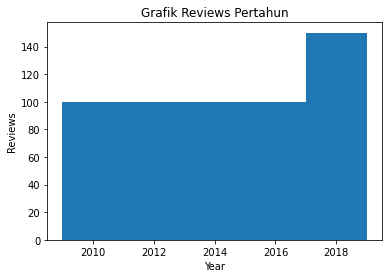

In [ ]:
fig=plt.figure()

ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df['Year'],bins = 5)
#Labels and Tit
plt.title('Grafik Reviews Pertahun')
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.show()

Berdasarkan Grafik diatas maka dapat dianalisa bahwa jumlah review buku pada website amazon.com yang tertinggi adalah tahun 2018 


- **Melihat keterkaitan hubungan data berdasarkan Tahun diterbitkannya buku dengan Review buku menggunakan Scatter Plot**

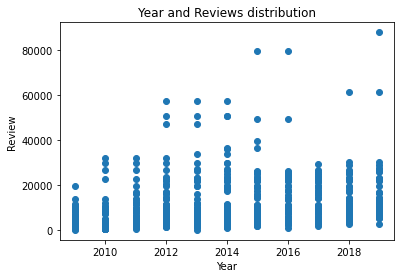

In [ ]:
#Plots in matplotlib reside within a figureobject, use plt.figure to create new figure
fig=plt.figure()

#Create one or more subplots usingadd_subplot, because you can'tcreate blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df['Year'],df['Reviews'])

#Labels and Tit
plt.title('Year and Reviews distribution')
plt.xlabel('Year')
plt.ylabel('Review')
plt.show()

Berdasarkan Scatterplot diatas menunjukkan bahwa data yang dianalisa merupakan data normal.

- **Box-plot keterkaitan User Rating terhadap Genre buku**

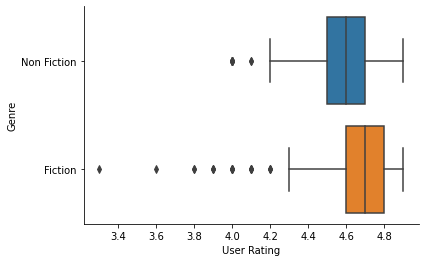

In [ ]:
sns.boxplot(data=df, x='User Rating', y='Genre')
sns.despine()
plt.show()

Berdasarkan Boxplot diatas dapat dilihat bahwa: 

*   Nilai median user rating terhadap genre buku memiliki perbedaan. Hal ini dapat diliat dari adanya perbedaan antara nilai median yang tidak signifikan antara genre fiction dan non fiction.
*   Interval bawah genre non fiction dan fiction jauh lebih banyak dibandingkan interval atasnya. 
*   IQR (interquartile range) atau simpangan kuartil. Dimana IQR adalah ukuran yang digunakan untuk mengukur penyebaran data. Jika Semakin lebar boxplot maka menunjukkan data semakin menyebar. Maka dapat dilihat bahwa IQR User Rating terhadap kedua genre terjadi kesamaan dalam penyebaran nya dalam artian tersebar merata.






  


- **Tabel Frekuensi**

In [ ]:
test= df.groupby(['Name','User Rating'])
test.size()

Name                                                                                    User Rating
10-Day Green Smoothie Cleanse                                                           4.7            1
11/22/63: A Novel                                                                       4.6            1
12 Rules for Life: An Antidote to Chaos                                                 4.7            1
1984 (Signet Classics)                                                                  4.7            1
5,000 Awesome Facts (About Everything!) (National Geographic Kids)                      4.8            1
                                                                                                      ..
Winter of the World: Book Two of the Century Trilogy                                    4.5            1
Women Food and God: An Unexpected Path to Almost Everything                             4.2            1
Wonder                                                      

Tabel Frekuensi diatas digunakan untuk mengelompokkan judul buku dan user rating pada masing-masing buku. Sehingga pengguna dapat melihat judul buku beserta user rating yang telah diberikan oleh pengguna amazon.com.

- **Mengelompokkan Variabel**

In [ ]:
test= df.groupby(['User Rating'])
test.describe()

Reviews                                                          \
              count          mean           std      min       25%      50%   
User Rating                                                                   
3.3             1.0   9372.000000           NaN   9372.0   9372.00   9372.0   
3.6             1.0  14982.000000           NaN  14982.0  14982.00  14982.0   
3.8             2.0  47265.000000      0.000000  47265.0  47265.00  47265.0   
3.9             3.0  24666.000000  15896.762312   6310.0  20077.00  33844.0   
4.0            14.0  17376.142857  22226.614355   1859.0   5069.00   5069.0   
4.1             6.0  32384.166667  38003.991187   1467.0   2085.25  15961.5   
4.2             8.0   4283.500000   4620.537446    491.0   1562.25   1941.5   
4.3            25.0   8362.880000   6570.520574    807.0   3523.00   6740.0   
4.4            38.0   7038.973684   6244.774254    440.0   1904.00   5342.0   
4.5            60.0   9231.116667   8086.518909    408.0   3346.25   7305.5   
4.6           105.0   9260.038095   8149.838102     37.0   3207.00   6990.0   
4.7           108.0  13660.925926  11555.175739    615.0   4725.00   9722.0   
4.8           127.0  13840.110236  13107.696524    548.0   4937.50   9737.0   
4.9            52.0  12957.423077   6898.999761   1884.0   7122.00  10966.5   

                                Price                                     \
                  75%      max  count       mean        std   min    25%   
User Rating                                                                
3.3           9372.00   9372.0    1.0  12.000000        NaN  12.0  12.00   
3.6          14982.00  14982.0    1.0  19.000000        NaN  19.0  19.00   
3.8          47265.00  47265.0    2.0  14.000000   0.000000  14.0  14.00   
3.9          33844.00  33844.0    3.0  17.666667   4.041452  13.0  16.50   
4.0          19247.00  57271.0   14.0  14.642857   3.342204   9.0  11.25   
4.1          66997.25  79446.0    6.0  11.666667   4.760952   6.0   7.75   
4.2           5576.00  13677.0    8.0  11.625000   4.749060   4.0   9.75   
4.3          13061.00  29442.0   25.0  13.280000   6.736221   6.0   8.00   
4.4          10559.00  25624.0   38.0  14.447368  11.233871   2.0   7.00   
4.5          10917.75  27536.0   60.0  20.933333  20.964754   1.0   8.75   
4.6          10927.00  36348.0  105.0  12.095238   6.584545   0.0   6.00   
4.7          19708.00  50482.0  108.0  12.990741  10.044290   0.0   8.00   
4.8          18613.00  87841.0  127.0  10.866142   8.075401   0.0   5.00   
4.9          19576.00  21834.0   52.0  10.288462   8.644020   0.0   5.75   

                                  Year                                 \
              50%    75%    max  count         mean       std     min   
User Rating                                                             
3.3          12.0  12.00   12.0    1.0  2012.000000       NaN  2012.0   
3.6          19.0  19.00   19.0    1.0  2015.000000       NaN  2015.0   
3.8          14.0  14.00   14.0    2.0  2012.500000  0.707107  2012.0   
3.9          20.0  20.00   20.0    3.0  2013.333333  0.577350  2013.0   
4.0          17.0  17.00   17.0   14.0  2012.928571  2.585887  2009.0   
4.1          12.0  14.75   18.0    6.0  2013.000000  2.280351  2010.0   
4.2          12.5  14.00   19.0    8.0  2011.250000  2.915476  2009.0   
4.3          12.0  16.00   36.0   25.0  2013.680000  3.602314  2009.0   
4.4          12.0  17.75   40.0   38.0  2012.815789  2.948708  2009.0   
4.5          14.0  21.50  105.0   60.0  2013.416667  2.912810  2009.0   
4.6          12.0  16.00   32.0  105.0  2013.314286  3.073817  2009.0   
4.7          10.0  15.00   82.0  108.0  2013.833333  3.125117  2009.0   
4.8           9.0  14.00   52.0  127.0  2014.929134  3.237138  2009.0   
4.9           8.0  10.00   54.0   52.0  2016.096154  2.361950  2011.0   

                                               
                 25%     50%      75%     max  
User Rating                          

- **Corellation Mapping**

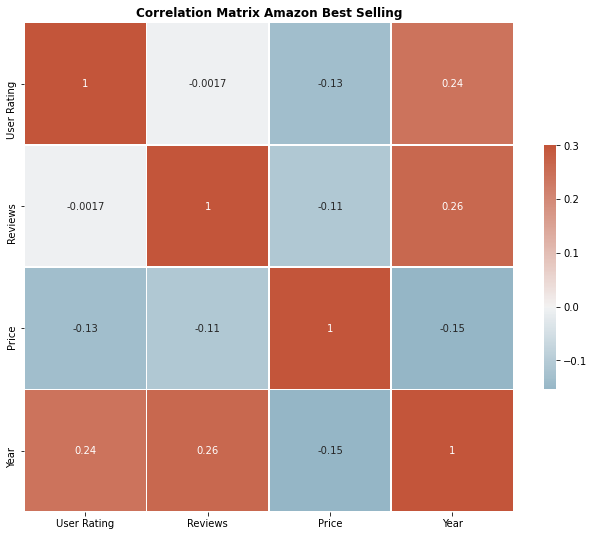

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Amazon Best",fontweight="bold")
plt.show()

Dilihat dari Corelation Mapping diatas dapat disimpulkan bahwa yang mempunyai: 

*   Korelasi positif yaitu kolom "Reviews" dan "Year", "User Rating dan Year".
*   Korelasi negatif yaitu "Price dan User Rating", "Price Year dan Year", "Price dan Reviews".

 




> **Evaluasi Model**



- **Analisa Top 20 Buku Dengan Jumlah Review Terbanyak**



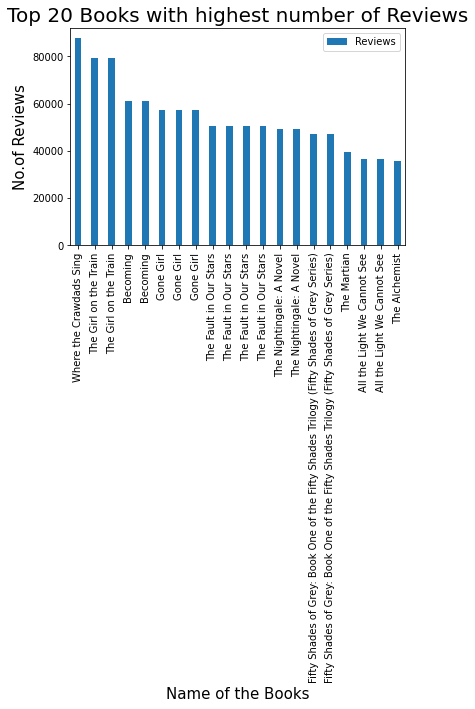

In [ ]:
df[["Name","Reviews"]].nlargest(20,"Reviews").plot.bar(x="Name",y="Reviews",width=0.4,)#'vertical', 'horizontal',color=color
plt.title("Top 20 Books with highest number of Reviews",fontsize=20)
plt.xlabel("Name of the Books",fontsize=15)
plt.ylabel("No.of Reviews",fontsize=15)
plt.show()

Berdasarkan grafik diatas kita bisa mengetahui top 20 buku yang paling banyak direview oleh pengguna amazon.com

- **Menganalisa kategori buku yang mempunyai review tertinggi**

In [ ]:
df[df.Reviews == max(df.Reviews)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Berdasarkan data diatas maka buku yang berjudul "Where the Crawdads Sing" memiliki jumlah review paling banyak yakni sebanyak 87841 review dari pembaca di situs amazon.com

- **Menganalisa kategori buku yang mempunyai review terendah**

In [ ]:
df[df.Reviews == min(df.Reviews)]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


Berdasarkan data diatas maka buku yang berjudul "Divine Mind Body Healling and Transmission" memiliki jumlah review paling sedikit yakni sebanyak 37 review dari pembaca di situs amazon.com

- **Melihat Jumlah Buku Berdasarkan Genre**

In [ ]:
df["Genre"].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Dapat kita lihat bahwa jumlah buku dengan genre non fiction sejumlah 310 dan jumlah buku dengan genre fiction sejumlah 240 

- **Analisa kategori buku yang termasuk Top 50 dengan User Rating Tertinggi**

In [ ]:
df[["Name","User Rating","Author","Genre"]].nlargest(50,"User Rating")

,Name,User Rating,Author,Genre
40,"Brown Bear, Brown Bear, What Do You See?",4.9,Bill Martin Jr.,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",4.9,Bill Martin Jr.,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,4.9,Dav Pilkey,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,4.9,Dav Pilkey,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,4.9,Dav Pilkey,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,4.9,Dav Pilkey,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,4.9,Dav Pilkey,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,4.9,Dav Pilkey,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,4.9,Dav Pilkey,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",4.9,Sherri Duskey Rinker,Fiction


Hasil data diatas merupakan 50 buku dengan perolehan user rating tertinggi di situs amazon.com pada tahun 2009-2019. Dan Buku yang mendapatkan perolehan user rating tertinggi adalah "Brown Bear, Brown Bear, What Do You See?" Karya Bill Martin Jr, yang ber-genre fiksi dan mendapatkan rating 4.9. 

- **Kesimpulan**

Berdasarkan data yang telah diamati diatas maka dapat disimpulkan bahwa:
1. Dilihat dari Explorasi data diatas maka dataset ini tidak memiliki nilai kosong yang harus dihilangkan. Dan dataset ini memiliki 550 baris, dan 7 kolom  
2.  Berdasarkan pemodelan diatas dapat disimpulkan bahwa dataset ini dalam kategori data normal yang mana telah dianalisa diatas. 
3.  Dilihat dari mapping data pada data set ini bahwa terjadinya korelasi positif dan negatif. Dimana yang mempunyai korelasi positif yakni hubungan antara Reviews dan Year, dan User Rating dan Year.
4. Berdasarkan evaluasi data diatas maka:
- Buku yang mendapatkan perolehan **user rating tertinggi** adalah "Brown Bear, Brown Bear, What Do You See?" Karya Bill Martin Jr, yang ber-genre fiksi dan mendapatkan rating 4.9. 
- Jumlah buku dengan genre non fiction sejumlah 310 dan jumlah buku dengan genre fiction sejumlah 240 
- Buku dengan Review terendah adalah "Divine Mind Body Healling and Transmission" Karya Zhi Gang Sha
- Buku dengan Review teratas adalah "Where the Crawdads Sing" Karya Della Ownes

